In [15]:
import pandas as pd
import numpy as np
import re
from matplotlib import pyplot as plt
import nltk
from wordcloud import WordCloud, STOPWORDS

# Leitura da tabela gerada pelo gephi

In [27]:
data = pd.read_csv("GrafoInf.csv")
data

,Id,Label,timeset,idlattes,componentnumber,N,collaborationrank,producaobibliografica,artigoemperiodico,livro,...,trabalhoemcongresso,resumoexpandido,resumo,degree,weighted degree,Eccentricity,closnesscentrality,harmonicclosnesscentrality,betweenesscentrality,Nome
0,0,"[B, L, A]",NaN,47274636775859,0,[A],1.531110,90,36,0,...,5,29,19,12,24,9,0.228205,0.322102,0.066346,Bruno Leite dos Anjos
1,1,"[C, S, P]",NaN,120736228044122,0,NaN,1.309230,71,34,0,...,0,2,35,6,23,8,0.251412,0.322512,0.002487,Clesio Soldateli Paim
2,2,"[M, B, S]",NaN,130850513274456,0,NaN,0.382680,16,9,1,...,0,2,4,3,4,9,0.197778,0.257174,0.000716,Michele Bulhosa de Souza
3,3,"[C, I, F]",NaN,147193667632049,1,NaN,0.150000,82,3,0,...,0,7,72,0,0,0,0.000000,0.000000,0.000000,Claudete Izabel Funguetto
4,4,"[G, A, W]",NaN,319287015319197,0,[A],1.897600,178,29,0,...,2,4,143,4,137,10,0.217073,0.280021,0.002705,Giulia Alessandra Wiggers
5,5,"[P, V, I]",NaN,390762757228334,0,NaN,0.321239,48,18,0,...,13,3,13,3,3,8,0.220844,0.267777,0.005896,Phillip Vilanova Ilha
6,7,"[F, M, P]",NaN,454207116065740,0,NaN,1.873330,135,28,0,...,0,1,106,5,137,9,0.226463,0.294881,0.010135,Franck Maciel Pecanha
7,8,"[A, J, D]",NaN,473681435809042,2,[A],1.000000,37,7,1,...,7,18,4,1,1,1,1.000000,1.000000,0.000000,Ailton Jesus Dinardi
8,9,"[A, S, K, T, N]",NaN,527775082585913,0,[A],0.509672,55,15,0,...,0,0,39,5,6,9,0.239247,0.308405,0.045728,Alessandra Sayuri Kikuchi Tamajusuku Neis
9,10,"[G, D, S]",NaN,540637395800217,0,NaN,1.163200,105,32,0,...,3,25,45,6,18,9,0.206497,0.286495,0.022697,Graciela Dutra Sehnem


## Centralidade de grau ponderada

In [17]:
data[["Label", "weighted degree"]].sort_values("weighted degree", ascending=False).head()

,Label,weighted degree
121,"[F, F, S]",280
118,"[M, N]",255
115,"[L, D, L]",212
122,"[M, T, O]",181
4,"[G, A, W]",137


## Nº de produções bibliograficas

In [18]:
data[["Label", "producaobibliografica"]].sort_values("producaobibliografica", ascending=False).head()

,Label,producaobibliografica
71,"[F, P, C]",426
31,"[M, J, S]",242
73,"[A, S]",239
118,"[M, N]",230
74,"[J, C, E, P]",190


## Metricas gerais sobre a tabela

In [24]:
#total das produçoes bibliograficas
data[["producaobibliografica"]].sum()

producaobibliografica    9448
dtype: int64

In [26]:
#centralidade de grau ponderada média
data[["weighted degree"]].mean()

weighted degree    25.681159
dtype: float64

In [29]:
#centralidade de grau ponderada média
data[["degree"]].mean()

degree    3.057971
dtype: float64

In [28]:
data[["closnesscentrality"]].mean()

closnesscentrality    0.245964
dtype: float64

In [30]:
data[["betweenesscentrality"]].mean()

betweenesscentrality    0.011688
dtype: float64

# Geração de uma wordcloud com os titulos dos trabalhos

In [21]:
datasets = ['PB-0.html', 'PB-1.html', 'PB-2.html', 'PB-3.html', 'PB-4.html', 'PB-5.html','PB-6.html', 'PB-7.html','PB-8.html', 'PB-9.html', 'PB-10.html','PB-11.html', 'PB-12.html']
data_sets = []
for i in datasets:
    dataSet = str(open("./PB/" + i, "r",encoding="utf8").read())
    data_sets += re.findall('<b>(\w.*)</b>', dataSet, re.M|re.I)

In [61]:
def createCloud(separated_titles):
        stopwords = STOPWORDS.union(set(nltk.corpus.stopwords.words('portuguese')).union({"Rio", "Grande", "Sul", "Uruguaiana", "Efeito", "Análise", "Avaliação", "relato", "experiência", "estudo", "Efeitos", "sobre", "Perfil", "Relação", "Effects", "RS", "revisão", "caso", "uso", "Brasil", "Influência", "município", "literatura", "prática"}))
        text = " ".join(separated_titles)
        wordcloud = WordCloud( background_color='white', stopwords=stopwords, max_words=200, max_font_size=200, width=2560, height=1080)
        wordcloud.generate(text)
        fig = plt.figure(figsize=(21,9))
        plt.imshow(wordcloud)
        plt.axis('off')
        plt.show()
        #fig.savefig("wordcloud.png".format(i), dpi=120)

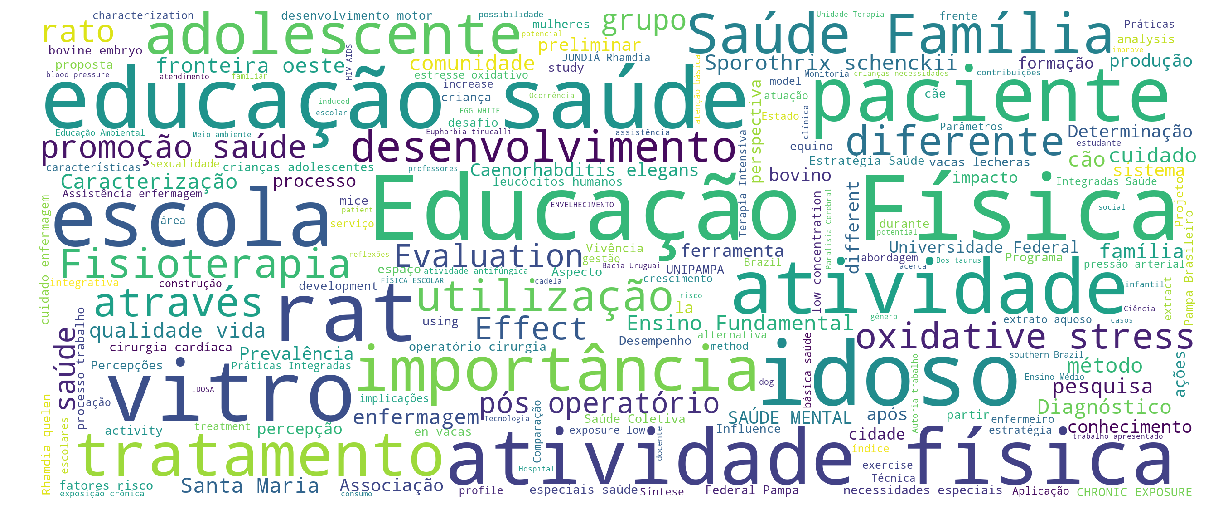

In [62]:
createCloud(data_sets)